In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn.preprocessing import *
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error,mean_absolute_error,classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [3]:
test_tweets  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ViralTweets/test_tweets.csv')
train_tweets = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ViralTweets/train_tweets.csv')

# test_tweets_vec = pd.read_csv('./Viral Tweets/Tweets/test_tweets_vectorized_media.csv')
train_tweets_vec = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ViralTweets/train_tweets_vectorized_media.csv')

#test_tweets_text = pd.read_csv('./Viral Tweets/Tweets/test_tweets_vectorized_text.csv')
#train_tweets_text = pd.read_csv('./Viral Tweets/Tweets/train_tweets_vectorized_text.csv')



In [4]:
#train_tweets.info()
train_tweets_vec.head()

,media_id,tweet_id,img_feature_0,img_feature_1,img_feature_2,img_feature_3,img_feature_4,img_feature_5,img_feature_6,img_feature_7,img_feature_8,img_feature_9,img_feature_10,img_feature_11,img_feature_12,img_feature_13,img_feature_14,img_feature_15,img_feature_16,img_feature_17,img_feature_18,img_feature_19,img_feature_20,img_feature_21,img_feature_22,img_feature_23,img_feature_24,img_feature_25,img_feature_26,img_feature_27,img_feature_28,img_feature_29,img_feature_30,img_feature_31,img_feature_32,img_feature_33,img_feature_34,img_feature_35,img_feature_36,img_feature_37,...,img_feature_2008,img_feature_2009,img_feature_2010,img_feature_2011,img_feature_2012,img_feature_2013,img_feature_2014,img_feature_2015,img_feature_2016,img_feature_2017,img_feature_2018,img_feature_2019,img_feature_2020,img_feature_2021,img_feature_2022,img_feature_2023,img_feature_2024,img_feature_2025,img_feature_2026,img_feature_2027,img_feature_2028,img_feature_2029,img_feature_2030,img_feature_2031,img_feature_2032,img_feature_2033,img_feature_2034,img_feature_2035,img_feature_2036,img_feature_2037,img_feature_2038,img_feature_2039,img_feature_2040,img_feature_2041,img_feature_2042,img_feature_2043,img_feature_2044,img_feature_2045,img_feature_2046,img_feature_2047
0,00001_00000,1,0.290614,0.150803,0.008313,0.040887,0.0,0.000000,0.214209,0.000792,0.00027,0.424207,0.000000,0.372124,0.031332,0.041069,0.000000,0.209875,0.232068,0.003567,0.185193,0.096734,0.127461,0.005552,0.000435,0.429719,0.024739,0.000051,0.000842,0.115226,0.000000,0.026856,0.000000,0.031253,0.032772,0.051137,0.026097,0.962891,0.132004,0.158875,...,0.000480,0.000000,0.018373,0.327092,0.079089,0.360097,0.002562,1.116611,0.054391,0.086378,0.045496,0.030632,0.000000,0.000000,0.000000,0.165220,0.000000,0.059310,0.111803,0.000000,0.109110,0.025834,0.235375,0.078341,0.131708,0.013988,0.000000,0.025960,0.015760,0.266088,0.000000,0.249240,0.040368,0.101314,0.000000,0.069272,0.167507,0.044617,0.383093,0.097627
1,00004_00003,4,0.038251,0.036437,0.000000,0.015076,0.0,0.046953,0.648170,0.026476,0.00000,0.191951,0.003372,0.000000,0.009363,0.000000,0.000000,0.012317,0.016527,0.130308,0.000000,0.000000,0.303246,0.000000,0.307988,0.011478,0.044807,0.208410,0.043399,0.118079,0.000222,0.083115,0.000000,0.634716,0.000000,0.014040,0.090266,0.000000,0.127964,0.189758,...,0.000000,0.001796,0.000000,0.251383,0.021052,0.802314,0.027913,0.335493,0.017326,0.000000,0.026515,0.056399,0.030597,0.082174,0.003829,0.083139,0.003266,0.249968,0.304901,0.004793,0.028569,0.000000,0.069980,0.007251,0.194076,0.000000,0.124188,0.000000,0.691953,0.009337,0.024564,0.035555,0.369353,0.000000,0.133307,0.000000,0.000000,0.017894,0.816972,0.058774
2,00005_00004,5,0.506981,0.305467,0.036150,0.114539,0.0,0.146888,0.584753,0.157468,0.00000,0.040884,0.009688,0.000000,0.000000,0.000000,0.074692,0.018211,0.233618,0.039807,0.000000,0.000000,0.169830,0.000000,0.045755,0.028518,0.000000,0.259838,0.117726,0.017544,0.018106,0.000000,0.019969,0.257562,0.000000,0.006338,0.000000,0.000000,0.090963,0.746206,...,0.000000,0.000000,0.032314,0.000000,0.000000,0.143607,0.371495,0.199860,0.192786,0.000000,0.401853,0.021595,0.033472,0.164238,0.085964,0.293521,0.000000,0.082590,0.020819,0.001283,0.009182,0.000000,0.295073,0.000000,0.300424,0.228981,0.109332,0.032641,0.263165,0.000992,0.000000,0.131493,0.268107,0.000000,0.036761,0.008600,0.018883,0.024825,0.123289,0.000000
3,00008_00007,8,0.000000,0.242857,0.000000,0.068217,0.0,0.117847,0.000000,0.000000,0.00000,0.040679,0.027965,0.000000,0.001766,0.014541,0.000000,0.010728,0.147126,0.574918,0.000000,0.126482,0.096826,0.040340,0.005732,0.000296,0.000000,0.081848,0.000000,0.001031,0.114108,0.000000,0.000000,0.702560,0.000000,0.307037,0.290887,0.003196,0.093841,0.257387,...,0.214097,0.000000,0.004700,0.005008,0.000000,0.540658,0.035425,0.069549,0.197432,0.023377,0.010510,0.000000,0.023421,0.000000,0.029902,0.067589,0.080281,0.005246,0.000000,0.000000,0.007966,0.000000,0.064383,0.255950,0.330105,0.000000

In [5]:
train_tweets.head()
#len(train_tweets_text)

,tweet_id,tweet_user_id,tweet_created_at_year,tweet_created_at_month,tweet_created_at_day,tweet_created_at_hour,tweet_hashtag_count,tweet_url_count,tweet_mention_count,tweet_has_attachment,tweet_attachment_class,tweet_language_id,tweet_topic_ids,virality
0,34698,10,2015,12,5,3,2.0,1.0,0.0,False,C,0,"['36', '36', '36', '36', '36', '36', '37', '37...",3
1,24644,4,2020,6,19,0,0.0,1.0,0.0,False,C,0,"['43', '78', '79', '80', '80', '89', '98', '99...",3
2,36321,54,2019,6,2,15,2.0,3.0,0.0,True,A,0,"['79', '80', '98', '98', '98', '99', '99', '10...",1
3,2629,42,2020,9,6,17,0.0,1.0,1.0,True,A,0,"['43', '79', '80', '98', '99', '99', '79', '80']",2
4,28169,32,2020,11,4,17,2.0,1.0,0.0,True,A,0,"['79', '80', '98', '99', '43', '89']",2


In [6]:
train_tweets.query('tweet_id == 1')

,tweet_id,tweet_user_id,tweet_created_at_year,tweet_created_at_month,tweet_created_at_day,tweet_created_at_hour,tweet_hashtag_count,tweet_url_count,tweet_mention_count,tweet_has_attachment,tweet_attachment_class,tweet_language_id,tweet_topic_ids,virality
1346,1,8,2021,1,22,19,1.0,1.0,0.0,True,A,0,"['78', '79', '80']",1


In [7]:
train_tweets['virality'].unique()

array([3, 1, 2, 5, 4])

In [8]:
print(len(train_tweets))
print(len(train_tweets_vec))

29625
21010


In [9]:
train_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29625 entries, 0 to 29624
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tweet_id                29625 non-null  int64  
 1   tweet_user_id           29625 non-null  int64  
 2   tweet_created_at_year   29625 non-null  int64  
 3   tweet_created_at_month  29625 non-null  int64  
 4   tweet_created_at_day    29625 non-null  int64  
 5   tweet_created_at_hour   29625 non-null  int64  
 6   tweet_hashtag_count     29625 non-null  float64
 7   tweet_url_count         29625 non-null  float64
 8   tweet_mention_count     29625 non-null  float64
 9   tweet_has_attachment    29625 non-null  bool   
 10  tweet_attachment_class  29625 non-null  object 
 11  tweet_language_id       29625 non-null  int64  
 12  tweet_topic_ids         25340 non-null  object 
 13  virality                29625 non-null  int64  
dtypes: bool(1), float64(3), int64(8), obje

In [10]:
train_tweets_vec.isnull().sum()

media_id            0
tweet_id            0
img_feature_0       0
img_feature_1       0
img_feature_2       0
                   ..
img_feature_2043    0
img_feature_2044    0
img_feature_2045    0
img_feature_2046    0
img_feature_2047    0
Length: 2050, dtype: int64

In [11]:
train_tweets.isnull().sum()

tweet_id                     0
tweet_user_id                0
tweet_created_at_year        0
tweet_created_at_month       0
tweet_created_at_day         0
tweet_created_at_hour        0
tweet_hashtag_count          0
tweet_url_count              0
tweet_mention_count          0
tweet_has_attachment         0
tweet_attachment_class       0
tweet_language_id            0
tweet_topic_ids           4285
virality                     0
dtype: int64

In [12]:
labels = [          
                    'tweet_id',
                    'tweet_user_id',
                    'tweet_hashtag_count',
                    'tweet_url_count',
                    'tweet_mention_count',
                   'tweet_has_attachment',
                    'tweet_attachment_class',
                    'tweet_language_id',
                    'virality'
                   ]
data = train_tweets[labels]

In [13]:
len(data)

29625

In [14]:
train_tweets_vec.drop('media_id',inplace = True,axis = 1)
data2 = train_tweets_vec.copy()

                    

In [15]:
data2.head()

,tweet_id,img_feature_0,img_feature_1,img_feature_2,img_feature_3,img_feature_4,img_feature_5,img_feature_6,img_feature_7,img_feature_8,img_feature_9,img_feature_10,img_feature_11,img_feature_12,img_feature_13,img_feature_14,img_feature_15,img_feature_16,img_feature_17,img_feature_18,img_feature_19,img_feature_20,img_feature_21,img_feature_22,img_feature_23,img_feature_24,img_feature_25,img_feature_26,img_feature_27,img_feature_28,img_feature_29,img_feature_30,img_feature_31,img_feature_32,img_feature_33,img_feature_34,img_feature_35,img_feature_36,img_feature_37,img_feature_38,...,img_feature_2008,img_feature_2009,img_feature_2010,img_feature_2011,img_feature_2012,img_feature_2013,img_feature_2014,img_feature_2015,img_feature_2016,img_feature_2017,img_feature_2018,img_feature_2019,img_feature_2020,img_feature_2021,img_feature_2022,img_feature_2023,img_feature_2024,img_feature_2025,img_feature_2026,img_feature_2027,img_feature_2028,img_feature_2029,img_feature_2030,img_feature_2031,img_feature_2032,img_feature_2033,img_feature_2034,img_feature_2035,img_feature_2036,img_feature_2037,img_feature_2038,img_feature_2039,img_feature_2040,img_feature_2041,img_feature_2042,img_feature_2043,img_feature_2044,img_feature_2045,img_feature_2046,img_feature_2047
0,1,0.290614,0.150803,0.008313,0.040887,0.0,0.000000,0.214209,0.000792,0.00027,0.424207,0.000000,0.372124,0.031332,0.041069,0.000000,0.209875,0.232068,0.003567,0.185193,0.096734,0.127461,0.005552,0.000435,0.429719,0.024739,0.000051,0.000842,0.115226,0.000000,0.026856,0.000000,0.031253,0.032772,0.051137,0.026097,0.962891,0.132004,0.158875,0.000000,...,0.000480,0.000000,0.018373,0.327092,0.079089,0.360097,0.002562,1.116611,0.054391,0.086378,0.045496,0.030632,0.000000,0.000000,0.000000,0.165220,0.000000,0.059310,0.111803,0.000000,0.109110,0.025834,0.235375,0.078341,0.131708,0.013988,0.000000,0.025960,0.015760,0.266088,0.000000,0.249240,0.040368,0.101314,0.000000,0.069272,0.167507,0.044617,0.383093,0.097627
1,4,0.038251,0.036437,0.000000,0.015076,0.0,0.046953,0.648170,0.026476,0.00000,0.191951,0.003372,0.000000,0.009363,0.000000,0.000000,0.012317,0.016527,0.130308,0.000000,0.000000,0.303246,0.000000,0.307988,0.011478,0.044807,0.208410,0.043399,0.118079,0.000222,0.083115,0.000000,0.634716,0.000000,0.014040,0.090266,0.000000,0.127964,0.189758,0.113801,...,0.000000,0.001796,0.000000,0.251383,0.021052,0.802314,0.027913,0.335493,0.017326,0.000000,0.026515,0.056399,0.030597,0.082174,0.003829,0.083139,0.003266,0.249968,0.304901,0.004793,0.028569,0.000000,0.069980,0.007251,0.194076,0.000000,0.124188,0.000000,0.691953,0.009337,0.024564,0.035555,0.369353,0.000000,0.133307,0.000000,0.000000,0.017894,0.816972,0.058774
2,5,0.506981,0.305467,0.036150,0.114539,0.0,0.146888,0.584753,0.157468,0.00000,0.040884,0.009688,0.000000,0.000000,0.000000,0.074692,0.018211,0.233618,0.039807,0.000000,0.000000,0.169830,0.000000,0.045755,0.028518,0.000000,0.259838,0.117726,0.017544,0.018106,0.000000,0.019969,0.257562,0.000000,0.006338,0.000000,0.000000,0.090963,0.746206,0.240639,...,0.000000,0.000000,0.032314,0.000000,0.000000,0.143607,0.371495,0.199860,0.192786,0.000000,0.401853,0.021595,0.033472,0.164238,0.085964,0.293521,0.000000,0.082590,0.020819,0.001283,0.009182,0.000000,0.295073,0.000000,0.300424,0.228981,0.109332,0.032641,0.263165,0.000992,0.000000,0.131493,0.268107,0.000000,0.036761,0.008600,0.018883,0.024825,0.123289,0.000000
3,8,0.000000,0.242857,0.000000,0.068217,0.0,0.117847,0.000000,0.000000,0.00000,0.040679,0.027965,0.000000,0.001766,0.014541,0.000000,0.010728,0.147126,0.574918,0.000000,0.126482,0.096826,0.040340,0.005732,0.000296,0.000000,0.081848,0.000000,0.001031,0.114108,0.000000,0.000000,0.702560,0.000000,0.307037,0.290887,0.003196,0.093841,0.257387,0.388468,...,0.214097,0.000000,0.004700,0.005008,0.000000,0.540658,0.035425,0.069549,0.197432,0.023377,0.010510,0.000000,0.023421,0.000000,0.029902,0.067589,0.080281,0.005246,0.000000,0.000000,0.007966,0.000000,0.064383,0.255950,0.330105,0.000000,0.027

In [16]:
fin_data = pd.merge(data,data2,on = "tweet_id")

In [17]:
fin_data.head()

,tweet_id,tweet_user_id,tweet_hashtag_count,tweet_url_count,tweet_mention_count,tweet_has_attachment,tweet_attachment_class,tweet_language_id,virality,img_feature_0,img_feature_1,img_feature_2,img_feature_3,img_feature_4,img_feature_5,img_feature_6,img_feature_7,img_feature_8,img_feature_9,img_feature_10,img_feature_11,img_feature_12,img_feature_13,img_feature_14,img_feature_15,img_feature_16,img_feature_17,img_feature_18,img_feature_19,img_feature_20,img_feature_21,img_feature_22,img_feature_23,img_feature_24,img_feature_25,img_feature_26,img_feature_27,img_feature_28,img_feature_29,img_feature_30,...,img_feature_2008,img_feature_2009,img_feature_2010,img_feature_2011,img_feature_2012,img_feature_2013,img_feature_2014,img_feature_2015,img_feature_2016,img_feature_2017,img_feature_2018,img_feature_2019,img_feature_2020,img_feature_2021,img_feature_2022,img_feature_2023,img_feature_2024,img_feature_2025,img_feature_2026,img_feature_2027,img_feature_2028,img_feature_2029,img_feature_2030,img_feature_2031,img_feature_2032,img_feature_2033,img_feature_2034,img_feature_2035,img_feature_2036,img_feature_2037,img_feature_2038,img_feature_2039,img_feature_2040,img_feature_2041,img_feature_2042,img_feature_2043,img_feature_2044,img_feature_2045,img_feature_2046,img_feature_2047
0,36321,54,2.0,3.0,0.0,True,A,0,1,0.000000,0.000000,0.000000,0.000952,0.000000,0.000000,0.000000,0.000000,0.000000,0.045752,0.805993,0.000249,0.000000,0.157353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008259,0.058777,0.000033,0.000000,0.106319,0.000000,0.000000,0.000000,0.000000,...,0.220414,0.001185,0.462674,0.138349,0.116741,0.000000,0.001529,0.013297,0.008513,0.000000,0.000000,0.227412,0.158956,0.004506,0.005311,0.000000,0.065162,0.092657,0.000000,0.000000,0.000000,0.247118,0.021100,0.182983,0.000000,0.000000,0.000000,0.003427,0.038733,0.000000,0.113230,0.000000,0.011789,0.000000,0.771060,0.000067,0.006356,0.000000,0.226988,0.000000
1,36321,54,2.0,3.0,0.0,True,A,0,1,0.000000,0.000000,0.000945,0.074225,0.000000,0.000000,0.000000,0.000000,0.004958,0.000000,0.455139,0.000131,0.000000,0.298607,0.000000,0.000000,0.000312,0.034841,0.000000,0.000068,0.120551,0.000000,0.006751,0.001998,0.000000,0.000000,0.118053,0.038885,0.000000,0.000000,0.093453,...,0.349421,0.055902,0.024401,0.019175,0.303604,0.015734,0.027116,0.059909,0.033189,0.022830,0.000000,0.423615,0.437356,0.000000,0.178042,0.000000,0.000000,0.099258,0.000000,0.005095,0.000000,0.117888,0.062488,0.014747,0.000273,0.000000,0.038280,0.000000,0.000000,0.000000,0.167512,0.000000,0.483399,0.000000,0.425594,0.199178,0.000000,0.021421,0.264460,0.000000
2,2629,42,0.0,1.0,1.0,True,A,0,2,0.432115,0.024328,0.156661,0.259233,0.000000,0.011513,0.785601,0.000000,0.000000,0.542256,0.001282,0.014192,0.000000,0.000000,0.169581,0.066675,0.336978,0.364913,0.102721,0.580277,0.191546,0.309697,0.003283,0.302129,0.043264,0.016768,0.000884,0.236840,0.010659,0.016407,0.006980,...,0.061926,0.248476,0.011648,0.231627,0.080452,0.817106,0.167265,0.145384,0.172235,0.070669,0.027987,0.009929,0.045970,0.071446,0.003195,0.910894,0.042366,0.040718,0.006463,0.000000,0.000000,0.048671,0.175589,0.404950,0.316478,0.007046,0.051803,0.659329,0.069822,0.211618,0.107145,0.169376,0.073511,0.063717,0.041688,0.000806,0.221774,0.070632,0.566175,0.096326
3,28169,32,2.0,1.0,0.0,True,A,0,2,0.197615,0.031077,0.001344,0.051649,0.006327,0.068950,0.093533,0.039977,0.113105,0.007872,0.005107,0.000000,0.214862,0.230659,0.586029,0.006227,0.000000,0.236382,0.102273,0.001817,0.006286,0.550451,0.000000,0.221181,0.129838,0.000000,0.132502,0.000000,0.857872,0.154564,0.020605,...,0.225530,0.000000,0.000000,0.257047,0.110951,0.305748,0.000000,0.069338,0.109803,0.000735,0.000000,0.097077,0.190962,0.066484,0.023735,0.076605,0.000298,0.326171,0.176315,0.317110,0.083596,0.154966,0.017028,0.110083,0.000000,0.000000,0.062870,0.684171,1.048283,0.058532,0.333704,0.176434,0.899527,0.000000,0.173952,0.033498,0.791437,0.007850,0.142623,0.000000
4,3

In [18]:
fin_data.isnull().sum()

tweet_id               0
tweet_user_id          0
tweet_hashtag_count    0
tweet_url_count        0
tweet_mention_count    0
                      ..
img_feature_2043       0
img_feature_2044       0
img_feature_2045       0
img_feature_2046       0
img_feature_2047       0
Length: 2057, dtype: int64

In [19]:
y = fin_data.virality
fin_data.drop('virality',inplace = True,axis = 1)

In [20]:
cat_cols = ['tweet_has_attachment','tweet_attachment_class']

In [21]:
enco = LabelEncoder()

In [22]:
for col in cat_cols:
    fin_data[col] = enco.fit_transform(fin_data[col])

In [23]:
fin_data.head()

,tweet_id,tweet_user_id,tweet_hashtag_count,tweet_url_count,tweet_mention_count,tweet_has_attachment,tweet_attachment_class,tweet_language_id,img_feature_0,img_feature_1,img_feature_2,img_feature_3,img_feature_4,img_feature_5,img_feature_6,img_feature_7,img_feature_8,img_feature_9,img_feature_10,img_feature_11,img_feature_12,img_feature_13,img_feature_14,img_feature_15,img_feature_16,img_feature_17,img_feature_18,img_feature_19,img_feature_20,img_feature_21,img_feature_22,img_feature_23,img_feature_24,img_feature_25,img_feature_26,img_feature_27,img_feature_28,img_feature_29,img_feature_30,img_feature_31,...,img_feature_2008,img_feature_2009,img_feature_2010,img_feature_2011,img_feature_2012,img_feature_2013,img_feature_2014,img_feature_2015,img_feature_2016,img_feature_2017,img_feature_2018,img_feature_2019,img_feature_2020,img_feature_2021,img_feature_2022,img_feature_2023,img_feature_2024,img_feature_2025,img_feature_2026,img_feature_2027,img_feature_2028,img_feature_2029,img_feature_2030,img_feature_2031,img_feature_2032,img_feature_2033,img_feature_2034,img_feature_2035,img_feature_2036,img_feature_2037,img_feature_2038,img_feature_2039,img_feature_2040,img_feature_2041,img_feature_2042,img_feature_2043,img_feature_2044,img_feature_2045,img_feature_2046,img_feature_2047
0,36321,54,2.0,3.0,0.0,0,0,0,0.000000,0.000000,0.000000,0.000952,0.000000,0.000000,0.000000,0.000000,0.000000,0.045752,0.805993,0.000249,0.000000,0.157353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008259,0.058777,0.000033,0.000000,0.106319,0.000000,0.000000,0.000000,0.000000,0.079356,...,0.220414,0.001185,0.462674,0.138349,0.116741,0.000000,0.001529,0.013297,0.008513,0.000000,0.000000,0.227412,0.158956,0.004506,0.005311,0.000000,0.065162,0.092657,0.000000,0.000000,0.000000,0.247118,0.021100,0.182983,0.000000,0.000000,0.000000,0.003427,0.038733,0.000000,0.113230,0.000000,0.011789,0.000000,0.771060,0.000067,0.006356,0.000000,0.226988,0.000000
1,36321,54,2.0,3.0,0.0,0,0,0,0.000000,0.000000,0.000945,0.074225,0.000000,0.000000,0.000000,0.000000,0.004958,0.000000,0.455139,0.000131,0.000000,0.298607,0.000000,0.000000,0.000312,0.034841,0.000000,0.000068,0.120551,0.000000,0.006751,0.001998,0.000000,0.000000,0.118053,0.038885,0.000000,0.000000,0.093453,0.130032,...,0.349421,0.055902,0.024401,0.019175,0.303604,0.015734,0.027116,0.059909,0.033189,0.022830,0.000000,0.423615,0.437356,0.000000,0.178042,0.000000,0.000000,0.099258,0.000000,0.005095,0.000000,0.117888,0.062488,0.014747,0.000273,0.000000,0.038280,0.000000,0.000000,0.000000,0.167512,0.000000,0.483399,0.000000,0.425594,0.199178,0.000000,0.021421,0.264460,0.000000
2,2629,42,0.0,1.0,1.0,0,0,0,0.432115,0.024328,0.156661,0.259233,0.000000,0.011513,0.785601,0.000000,0.000000,0.542256,0.001282,0.014192,0.000000,0.000000,0.169581,0.066675,0.336978,0.364913,0.102721,0.580277,0.191546,0.309697,0.003283,0.302129,0.043264,0.016768,0.000884,0.236840,0.010659,0.016407,0.006980,0.315101,...,0.061926,0.248476,0.011648,0.231627,0.080452,0.817106,0.167265,0.145384,0.172235,0.070669,0.027987,0.009929,0.045970,0.071446,0.003195,0.910894,0.042366,0.040718,0.006463,0.000000,0.000000,0.048671,0.175589,0.404950,0.316478,0.007046,0.051803,0.659329,0.069822,0.211618,0.107145,0.169376,0.073511,0.063717,0.041688,0.000806,0.221774,0.070632,0.566175,0.096326
3,28169,32,2.0,1.0,0.0,0,0,0,0.197615,0.031077,0.001344,0.051649,0.006327,0.068950,0.093533,0.039977,0.113105,0.007872,0.005107,0.000000,0.214862,0.230659,0.586029,0.006227,0.000000,0.236382,0.102273,0.001817,0.006286,0.550451,0.000000,0.221181,0.129838,0.000000,0.132502,0.000000,0.857872,0.154564,0.020605,0.346138,...,0.225530,0.000000,0.000000,0.257047,0.110951,0.305748,0.000000,0.069338,0.109803,0.000735,0.000000,0.097077,0.190962,0.066484,0.023735,0.076605,0.000298,0.326171,0.176315,0.317110,0.083596,0.154966,0.017028,0.110083,0.000000,0.000000,0.062870,0.684171,1.048283,0.058532,0.333704,0.176434,0.899527,0.000000,0.173952,0.033498,0.791437,0.007850

In [24]:
X = fin_data.copy()

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 33)

In [26]:
def train(n_est):
    acc_list  = []
        
    mod = RandomForestClassifier(n_estimators=n_est)
    mod.fit(X_train,y_train)
    print("Training model with n_est = ",n_est)
    preds = mod.predict(X_test)
        
    cf = confusion_matrix(y_test,preds)
    sns.heatmap(cf,annot = True)
    acc_score = accuracy_score(y_test,preds)
        
    acc_list.append("n_est: {} , accuracy: {}".format(n_est,acc_score))
    print(acc_list)
        
        

Training model with n_est =  300
['n_est: 300 , accuracy: 0.5318895763921941']


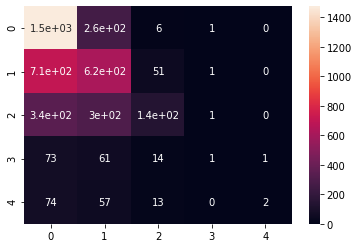

In [27]:
train(300)

Training model with neighbors =  5
['n: 5 , accuracy: 0.7020466444550214']


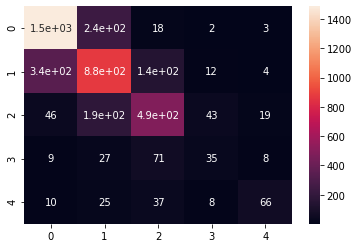

In [28]:
from sklearn.neighbors import KNeighborsClassifier

def train_knn(n):
    acc_list  = []
        
    mod = KNeighborsClassifier(n_neighbors = n)
    mod.fit(X_train,y_train)
    print("Training model with neighbors = ",n)
    preds = mod.predict(X_test)
        
    cf = confusion_matrix(y_test,preds)
    sns.heatmap(cf,annot = True)
    acc_score = accuracy_score(y_test,preds)
        
    acc_list.append("n: {} , accuracy: {}".format(n,acc_score))
    print(acc_list)
 

train_knn(5)
        

In [29]:
from sklearn.svm import SVC


def train_SVM(k,c):
    acc_list  = []
        
    mod = SVC(kernel = k,C = c)
    mod.fit(X_train,y_train)
    print("Training model with kernel = ",k)
    preds = mod.predict(X_test)
        
    cf = confusion_matrix(y_test,preds)
    sns.heatmap(cf,annot = True)
    acc_score = accuracy_score(y_test,preds)
        
    acc_list.append("n: {} , accuracy: {}".format(k,acc_score))
    print(acc_list)
    
    
def train_SVM2(g,c):
    acc_list  = []
        
    mod = SVC(gamma = g,C = c)
    mod.fit(X_train,y_train)
    print("Training model with gamma = ",g)
    preds = mod.predict(X_test)
        
    cf = confusion_matrix(y_test,preds)
    sns.heatmap(cf,annot = True)
    acc_score = accuracy_score(y_test,preds)
        
    acc_list.append("n: {} , accuracy: {}".format(g,acc_score))
    print(acc_list)
 

        

In [ ]:
train_SVM(k="linear", c=0.025)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
def train_ADA():
    acc_list  = []
        
    mod = AdaBoostClassifier()
    mod.fit(X_train,y_train)
    print("Training model")
    preds = mod.predict(X_test)
        
    cf = confusion_matrix(y_test,preds)
    sns.heatmap(cf,annot = True)
    acc_score = accuracy_score(y_test,preds)
        
    acc_list.append("accuracy: {}".format(acc_score))
    print(acc_list)


Training model
['accuracy: 0.5818657782008567']


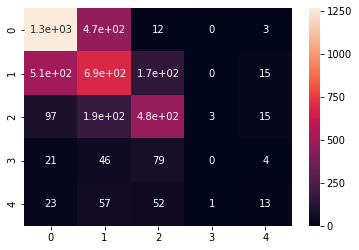

In [ ]:
train_ADA()

In [ ]:
from sklearn.naive_bayes import GaussianNB

def train_NB():
    acc_list  = []
        
    mod = GaussianNB()
    mod.fit(X_train,y_train)
    print("Training model")
    preds = mod.predict(X_test)
        
    cf = confusion_matrix(y_test,preds)
    sns.heatmap(cf,annot = True)
    acc_score = accuracy_score(y_test,preds)
        
    acc_list.append("accuracy: {}".format(acc_score))
    print(acc_list)


Training model
['accuracy: 0.43098524512137076']


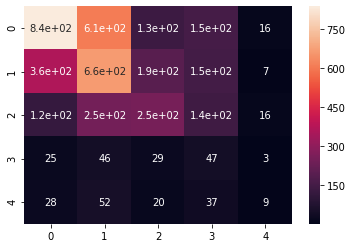

In [ ]:
train_NB()